# MINI CIFAR-10 dataset

The mini CIFAR-10 dataset has images of 150 images from each of the classes in the dataset. Split the train, valid, test sets into 60%, 20%, 20%.

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Create MINI CIFAR-10 with 150 images per class
mini_x_train = []
mini_y_train = []
mini_x_test = []
mini_y_test = []

for class_label in range(10):
    class_indices = np.where(y_train == class_label)[0]
    selected_indices = class_indices[:150]
    mini_x_train.append(x_train[selected_indices])
    mini_y_train.append(y_train[selected_indices])
    mini_x_test.append(x_test[selected_indices])
    mini_y_test.append(y_test[selected_indices])

mini_x_train = np.concatenate(mini_x_train)
mini_y_train = np.concatenate(mini_y_train)
mini_x_test = np.concatenate(mini_x_test)
mini_y_test = np.concatenate(mini_y_test)
#print(mini_x_train.shape)

# Split MINI dataset into train, validation, and test sets
train_size = 0.6
valid_size = 0.2
test_size = 0.2

sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, train_size=train_size, random_state=42)

for train_index, test_valid_index in sss.split(mini_x_train, mini_y_train):
    test_size = valid_size / (valid_size + test_size)
    valid_index, test_index = next(StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42).split(mini_x_train[test_valid_index], mini_y_train[test_valid_index]))

    x_train = mini_x_train[train_index]
    y_train = mini_y_train[train_index]

    x_valid = mini_x_train[test_valid_index][valid_index]
    y_valid = mini_y_train[test_valid_index][valid_index]

    x_test = mini_x_train[test_valid_index][test_index]
    y_test = mini_y_train[test_valid_index][test_index]

# Convert data to float32 and normalize
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print shapes of the split datasets
print("Train set:", x_train.shape, y_train.shape)
print("Validation set:", x_valid.shape, y_valid.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (900, 32, 32, 3) (900, 10)
Validation set: (150, 32, 32, 3) (150, 10)
Test set: (150, 32, 32, 3) (150, 10)


# Problem 1
## AlexNet architecture


In [ ]:
epochs = 30
batch_size = 32
initial_lr = 0.001  # Base learning rate
num_classes = 10

# Define AlexNet architecture
def alexnet(img_input, classes=10):
  model = Sequential()

  # Layer 1: Convolutional + MaxPooling
  model.add(Conv2D(96, (11, 11), strides=(3, 3), input_shape=img_input, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Layer 2: Convolutional + MaxPooling
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Layer 3: Convolutional
  model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

  # Layer 4: Convolutional
  model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

  # Layer 5: Convolutional + MaxPooling
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Flatten the output for Dense layers
  model.add(Flatten())

  # Layer 6: Dense (Fully Connected)
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))  # Adding dropout for regularization

  # Layer 7: Dense (Fully Connected)
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))  # Adding dropout for regularization

  # Output layer: Dense with softmax activation
  model.add(Dense(num_classes, activation='softmax'))

  return model


In [ ]:
# Prepare data and configure training
x_train = x_train.astype('float32') / 255.0
x_valid = x_valid.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# y_train = to_categorical(y_train, num_classes)
# y_valid = to_categorical(y_valid, num_classes)
# y_test = to_categorical(y_test, num_classes)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
model = alexnet(x_train.shape[1:], num_classes)
print("Output shape of model:", model.output_shape)
print(model.output)
model.summary()

Shape of x_train: (900, 32, 32, 3)
Shape of y_train: (900, 10)
Output shape of model: (None, 10)
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_2/Softmax:0', description="created by layer 'dense_2'")
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 11, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 96)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 256)         221440    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 256)         0         
 g2D)                                                            
        

In [ ]:
y_train = y_train.reshape(-1, 10)
y_train.shape

(9000, 10)

Epoch 1/30
29/29 [==============================] - 22s 699ms/step - loss: 2.3088 - accuracy: 0.0900 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/30
29/29 [==============================] - 20s 676ms/step - loss: 2.3071 - accuracy: 0.0822 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/30
29/29 [==============================] - 21s 705ms/step - loss: 2.3050 - accuracy: 0.0844 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/30
29/29 [==============================] - 19s 657ms/step - loss: 2.3053 - accuracy: 0.0989 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 5/30
29/29 [==============================] - 20s 684ms/step - loss: 2.3037 - accuracy: 0.0922 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/30
29/29 [==============================] - 19s 669ms/step - loss: 2.3046 - accuracy: 0.0844 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 7/30
29/29 [==============================] - 19s 664ms/step - loss: 2.3036 - accuracy: 0.0922 - val_loss: 2.3028 - val_accuracy: 0.1000

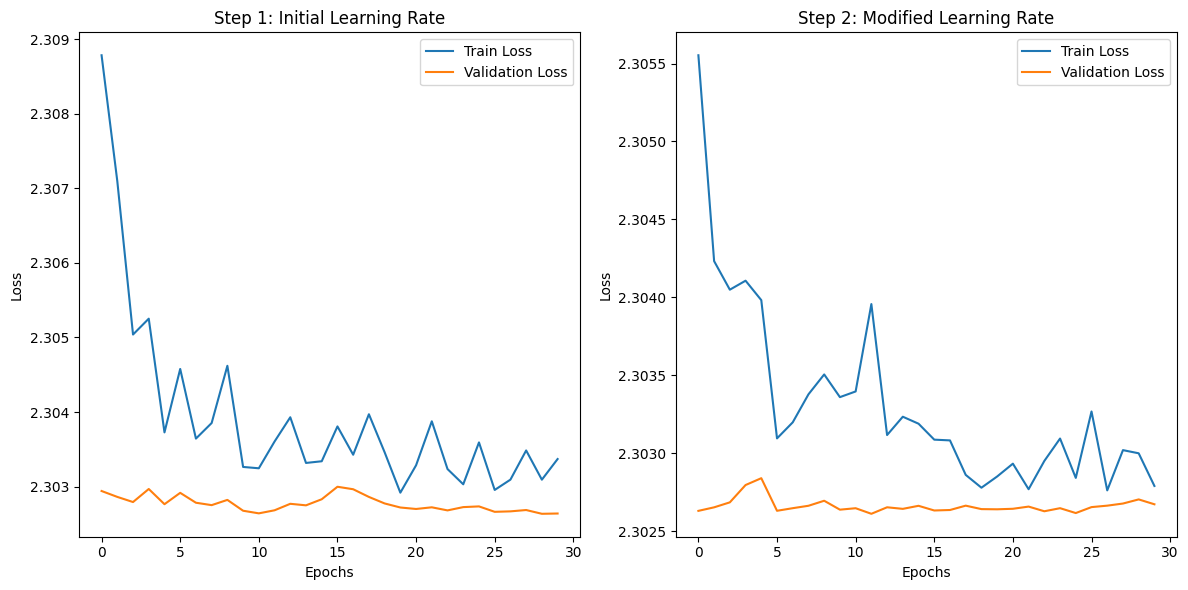

Step 1 - Test Loss: 2.3026, Test Accuracy: 10.00%
Step 2 - Test Loss: 2.3027, Test Accuracy: 10.00%


In [ ]:
# Step 1: Training with initial learning rate
model_run1 = alexnet(x_train.shape[1:], num_classes)
model_run1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=initial_lr), metrics=['accuracy'])
history_run1 = model_run1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid))

# Step 2: Training with modified learning rate
modified_lr = initial_lr * 0.5  # You can adjust the amount of increase/decrease here
model_run2 = alexnet(x_train.shape[1:], num_classes)
model_run2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=modified_lr), metrics=['accuracy'])
history_run2 = model_run2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid))

# Evaluate models on the test set
test_loss_run1, test_acc_run1 = model_run1.evaluate(x_test, y_test)
test_loss_run2, test_acc_run2 = model_run2.evaluate(x_test, y_test)

# Plot training and validation losses for both runs
plt.figure(figsize=(12, 6))

# Plot for Step 1
plt.subplot(1, 2, 1)
plt.plot(history_run1.history['loss'], label='Train Loss')
plt.plot(history_run1.history['val_loss'], label='Validation Loss')
plt.title('Step 1: Initial Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for Step 2
plt.subplot(1, 2, 2)
plt.plot(history_run2.history['loss'], label='Train Loss')
plt.plot(history_run2.history['val_loss'], label='Validation Loss')
plt.title('Step 2: Modified Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print test losses and accuracies
print("Step 1 - Test Loss: {:.4f}, Test Accuracy: {:.2f}%".format(test_loss_run1, test_acc_run1 * 100))
print("Step 2 - Test Loss: {:.4f}, Test Accuracy: {:.2f}%".format(test_loss_run2, test_acc_run2 * 100))

# Problem 2
## VGG16 architecture

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout

def create_vgg16(input_shape, num_classes):
    # Use pre-trained VGG16 weights up to the last convolutional layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    # Freeze base model layers for transfer learning
    #for layer in base_model.layers:
    #    layer.trainable = False
    base_model.trainable = False

    # Add custom layers for classification
    x = base_model.output
    x = Flatten()(x)
    # Add dropout layer here (e.g., x = Dropout(0.2)(x))
    x = Dropout(0.2)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs= base_model.input, outputs = x)
    return model


In [ ]:
# Run 1 (initial learning rate)
model_run1 = create_vgg16(x_train.shape[1:], num_classes)
model_run1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=initial_lr), metrics=['accuracy'])
history_run1 = model_run1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid))

# Run 2 (increased learning rate and dropout)
model_run2 = create_vgg16(x_train.shape[1:], num_classes)  # Create a new model
increased_lr = initial_lr * 2  # Adjust increase amount
model_run2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=increased_lr), metrics=['accuracy'])
history_run2 = model_run2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid))


Epoch 1/30
29/29 [==============================] - 13s 415ms/step - loss: 2.4566 - accuracy: 0.1000 - val_loss: 2.3910 - val_accuracy: 0.1000
Epoch 2/30
29/29 [==============================] - 12s 405ms/step - loss: 2.4261 - accuracy: 0.0856 - val_loss: 2.3286 - val_accuracy: 0.1000
Epoch 3/30
29/29 [==============================] - 12s 405ms/step - loss: 2.3446 - accuracy: 0.0867 - val_loss: 2.3175 - val_accuracy: 0.1000
Epoch 4/30
29/29 [==============================] - 13s 444ms/step - loss: 2.3444 - accuracy: 0.0878 - val_loss: 2.3385 - val_accuracy: 0.1200
Epoch 5/30
29/29 [==============================] - 12s 404ms/step - loss: 2.3376 - accuracy: 0.1033 - val_loss: 2.3097 - val_accuracy: 0.1000
Epoch 6/30
29/29 [==============================] - 12s 416ms/step - loss: 2.3199 - accuracy: 0.0900 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 7/30
29/29 [==============================] - 17s 602ms/step - loss: 2.3184 - accuracy: 0.1056 - val_loss: 2.3041 - val_accuracy: 0.1000

5/5 [==============================] - 1s 285ms/step - loss: 2.3027 - accuracy: 0.1000


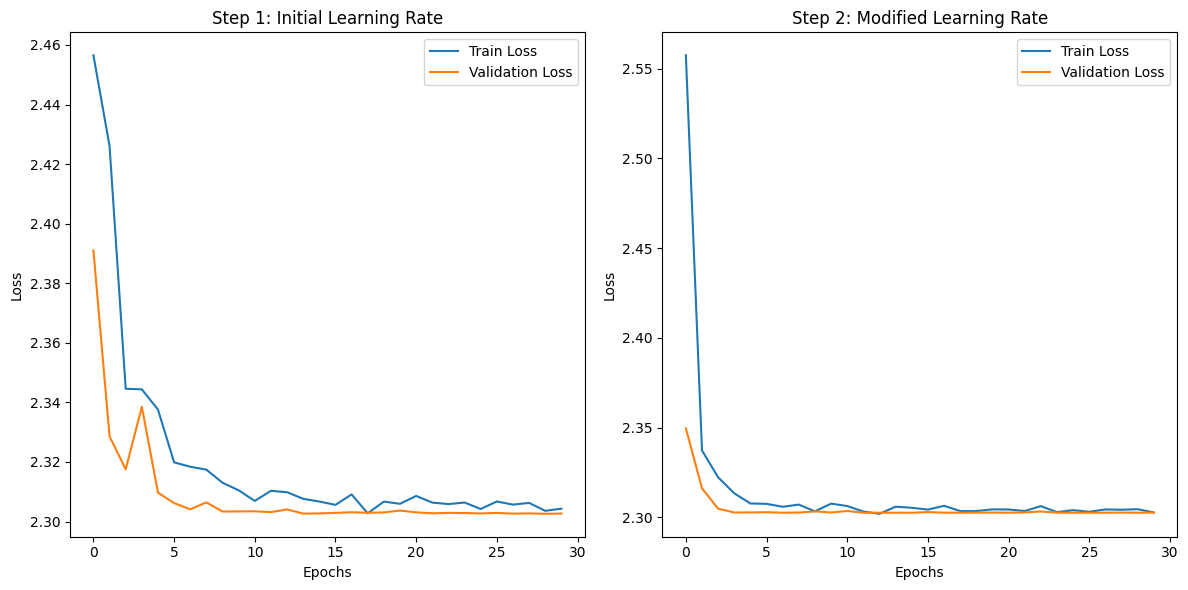

Step 1 - Test Loss: 2.3027, Test Accuracy: 10.00%
Step 2 - Test Loss: 2.3027, Test Accuracy: 10.00%


In [ ]:
# Evaluate models on the test set
test_loss_run1, test_acc_run1 = model_run1.evaluate(x_test, y_test)
test_loss_run2, test_acc_run2 = model_run2.evaluate(x_test, y_test)

# Plot training and validation losses for both runs
plt.figure(figsize=(12, 6))

# Plot for Step 1
plt.subplot(1, 2, 1)
plt.plot(history_run1.history['loss'], label='Train Loss')
plt.plot(history_run1.history['val_loss'], label='Validation Loss')
plt.title('Step 1: Initial Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for Step 2
plt.subplot(1, 2, 2)
plt.plot(history_run2.history['loss'], label='Train Loss')
plt.plot(history_run2.history['val_loss'], label='Validation Loss')
plt.title('Step 2: Modified Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print test losses and accuracies
print("Step 1 - Test Loss: {:.4f}, Test Accuracy: {:.2f}%".format(test_loss_run1, test_acc_run1 * 100))
print("Step 2 - Test Loss: {:.4f}, Test Accuracy: {:.2f}%".format(test_loss_run2, test_acc_run2 * 100))

# Problem 3
## ResNet50 architecture

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Dense, Input

# Define ResNet50 architecture
def create_resnet50(input_shape, num_classes):
  #base_model = Sequential([Input(shape=input_shape), ])
  # Load pre-trained ResNet50 without the top layer
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
  # Freeze base model layers for transfer learning
  for layer in base_model.layers:
      layer.trainable = False

  # Add custom layers for classification
  x = base_model.output
  x = Flatten()(x)
  x = Dense(256, activation='relu')(x)
  x = Dense(num_classes, activation='softmax')(x)

  # model = Sequential([base_model, x])
  model = Model(inputs=base_model.input, outputs=x)

  return model


Epoch 1/30
29/29 [==============================] - 10s 208ms/step - loss: 2.6187 - accuracy: 0.0856 - val_loss: 2.4542 - val_accuracy: 0.1000
Epoch 2/30
29/29 [==============================] - 4s 138ms/step - loss: 2.4955 - accuracy: 0.1033 - val_loss: 2.4283 - val_accuracy: 0.1000
Epoch 3/30
29/29 [==============================] - 5s 166ms/step - loss: 2.4115 - accuracy: 0.0978 - val_loss: 2.4648 - val_accuracy: 0.1000
Epoch 4/30
29/29 [==============================] - 4s 135ms/step - loss: 2.4379 - accuracy: 0.0878 - val_loss: 2.3827 - val_accuracy: 0.1000
Epoch 5/30
29/29 [==============================] - 5s 160ms/step - loss: 2.3994 - accuracy: 0.0989 - val_loss: 2.4200 - val_accuracy: 0.1000
Epoch 6/30
29/29 [==============================] - 4s 144ms/step - loss: 2.4405 - accuracy: 0.0978 - val_loss: 2.5484 - val_accuracy: 0.1000
Epoch 7/30
29/29 [==============================] - 4s 134ms/step - loss: 2.4572 - accuracy: 0.0922 - val_loss: 2.5010 - val_accuracy: 0.1000
Epoch

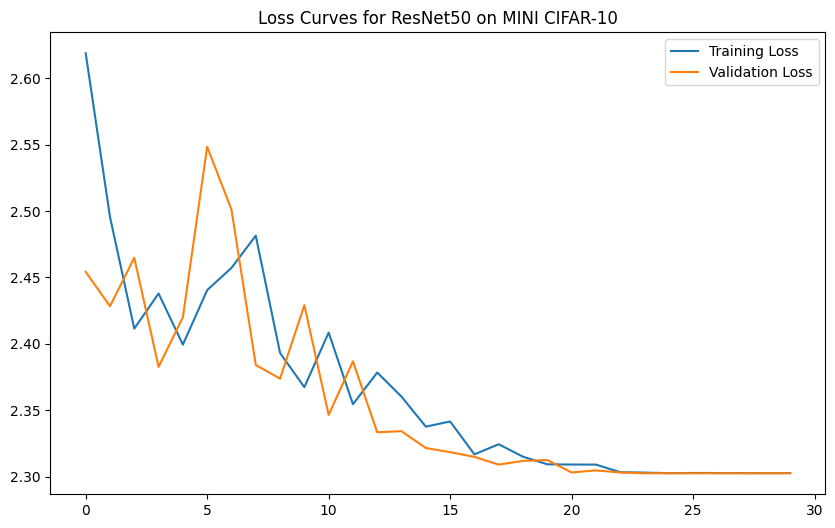

In [ ]:
# Build model
model = create_resnet50(x_train.shape[1:], num_classes)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid))

# 4. Plot training/validation/test losses
# Extract loss values from history object
train_loss = history.history['loss']
valid_loss = history.history['val_loss']
test_loss = model.evaluate(x_test, y_test)[0]  # Evaluate on test set

# Plot losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(valid_loss, label='Validation Loss')
plt.title('Loss Curves for ResNet50 on MINI CIFAR-10')
plt.legend()
plt.show()

# Problem 4
## DenseNet121 architecture

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121

# 2. Define DenseNet121 architecture
def create_densenet121(input_shape, num_classes):
    # Load pre-trained DenseNet121 without the top layer
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    # Freeze base model layers for transfer learning
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for classification
    #x = base_model.output
    inputs = Input(shape=input_shape)
    x = base_model(inputs)
    x = Flatten()(x)
    x = Dense(2048, activation='relu')(x)  # Additional dense layer
    # x = Dense(num_classes, activation='softmax')(x)
    # output_layer = Model(inputs=base_model.input, outputs=x)  # Wrap in a model
    # model = Sequential([base_model, output_layer])
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)  # Functional model

    #print(type(x))
    return model


Epoch 1/30
29/29 [==============================] - 13s 209ms/step - loss: 2.7700 - accuracy: 0.0911 - val_loss: 2.6265 - val_accuracy: 0.1000
Epoch 2/30
29/29 [==============================] - 5s 167ms/step - loss: 2.4849 - accuracy: 0.0922 - val_loss: 2.3552 - val_accuracy: 0.1000
Epoch 3/30
29/29 [==============================] - 4s 129ms/step - loss: 2.4126 - accuracy: 0.1044 - val_loss: 2.4347 - val_accuracy: 0.1000
Epoch 4/30
29/29 [==============================] - 4s 128ms/step - loss: 2.3940 - accuracy: 0.1089 - val_loss: 2.3554 - val_accuracy: 0.1000
Epoch 5/30
29/29 [==============================] - 5s 167ms/step - loss: 2.4040 - accuracy: 0.1089 - val_loss: 2.3330 - val_accuracy: 0.1600
Epoch 6/30
29/29 [==============================] - 4s 128ms/step - loss: 2.3523 - accuracy: 0.0989 - val_loss: 2.3363 - val_accuracy: 0.1333
Epoch 7/30
29/29 [==============================] - 4s 128ms/step - loss: 2.3497 - accuracy: 0.1000 - val_loss: 2.3265 - val_accuracy: 0.1333
Epoch

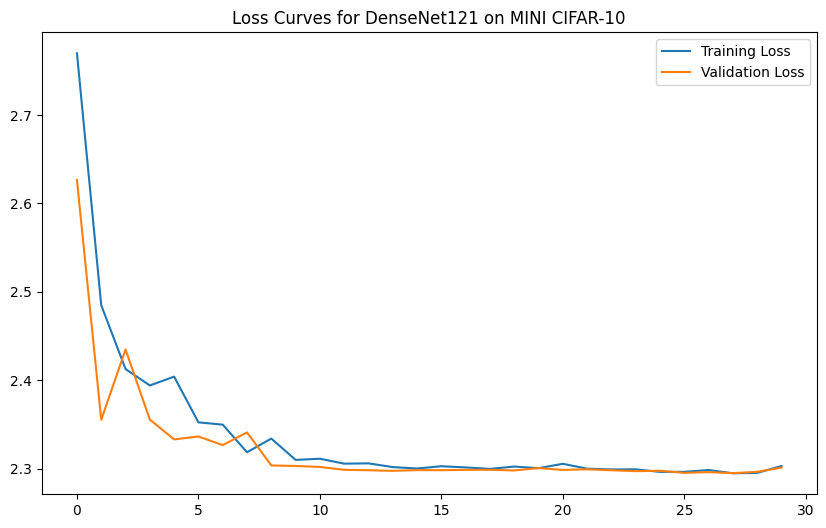

In [ ]:
# Build model
model = create_densenet121(x_train.shape[1:], num_classes)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid))

# 4. Plot training/validation/test losses
# Extract loss values from history object
train_loss = history.history['loss']
valid_loss = history.history['val_loss']
test_loss = model.evaluate(x_test, y_test)[0]  # Evaluate on test set

# Plot losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(valid_loss, label='Validation Loss')
plt.title('Loss Curves for DenseNet121 on MINI CIFAR-10')
plt.legend()
plt.show()


# Problem 5
## Rohi_net architecture

The model is named rohi_net with 3 convolutional layers and one hidden layer.

In [ ]:
# Define rohi_net architecture
def rohi_net(input_shape, num_classes):
    model = Sequential()

    # Conv layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer
    model.add(Flatten())

    # Dense layer 1
    model.add(Dense(256, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

Epoch 1/30
29/29 [==============================] - 2s 44ms/step - loss: 2.3037 - accuracy: 0.0944 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/30
29/29 [==============================] - 1s 38ms/step - loss: 2.3028 - accuracy: 0.0822 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/30
29/29 [==============================] - 1s 40ms/step - loss: 2.3028 - accuracy: 0.0811 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/30
29/29 [==============================] - 2s 64ms/step - loss: 2.3028 - accuracy: 0.1056 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/30
29/29 [==============================] - 1s 43ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/30
29/29 [==============================] - 1s 36ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/30
29/29 [==============================] - 1s 45ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/30
29

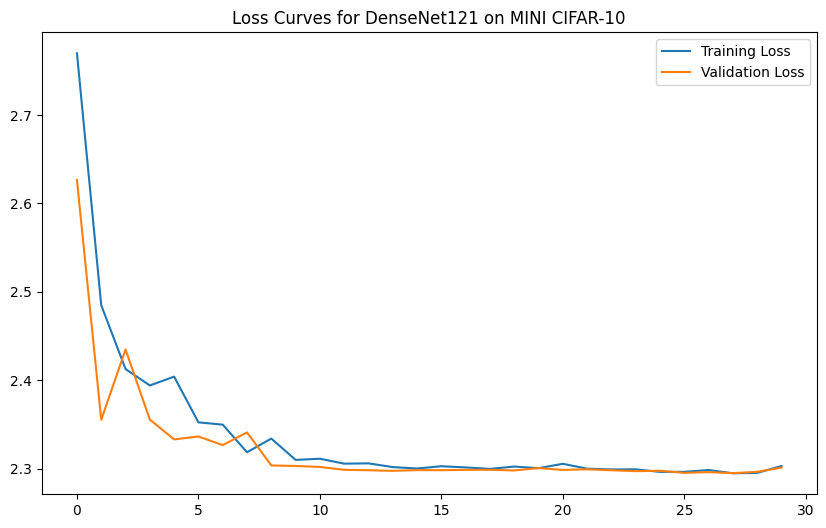

In [ ]:
# Build and train model
model = rohi_net(x_train.shape[1:], num_classes)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid))

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print losses
print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])
print("Test loss:", test_loss)

# Plot losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(valid_loss, label='Validation Loss')
plt.title('Loss Curves for DenseNet121 on MINI CIFAR-10')
plt.legend()
plt.show()